In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [229]:
df = pd.read_csv("C:/Users/ganes/Downloads/household_power_consumption.txt",delimiter=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [233]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [235]:
df.dropna(subset = ['Sub_metering_3'], inplace = True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [237]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 156.3+ MB


In [239]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16


In [241]:
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.minute

In [243]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16,17,24
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16,17,25
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16,17,26
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16,17,27
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16,17,28


In [245]:
df.drop(['Date'], axis = 1, inplace = True)
df.drop(['Time'], axis = 1, inplace = True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16,17,28


<Axes: >

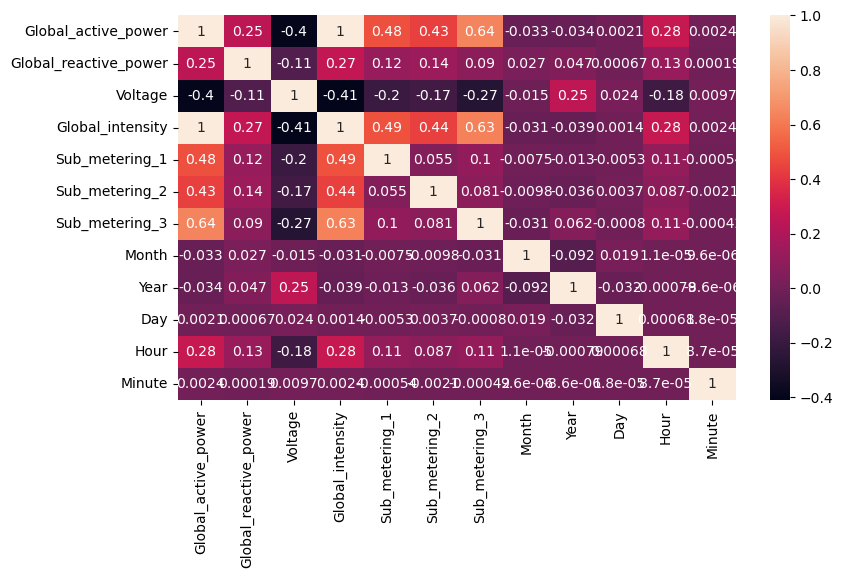

In [249]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (9, 5))
sns.heatmap(df.corr(), annot = True)

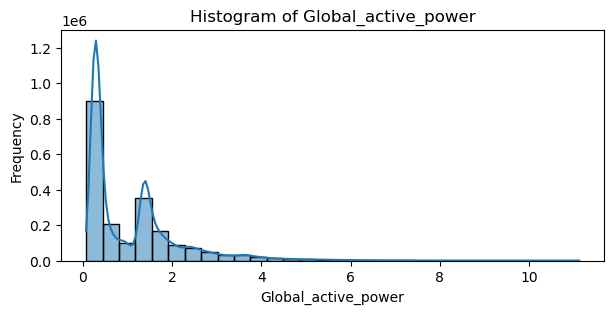

In [23]:
plt.figure(figsize = (7, 3))
sns.histplot(df['Global_active_power'], bins = 30, kde = True)
plt.title('Histogram of Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Frequency')
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


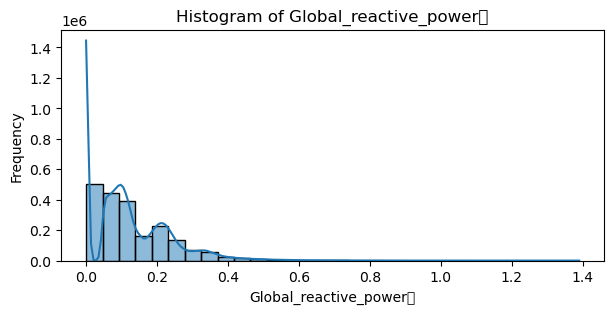

In [25]:
plt.figure(figsize = (7, 3))
sns.histplot(df['Global_reactive_power'], bins = 30, kde = True)
plt.title('Histogram of Global_reactive_power	')
plt.xlabel('Global_reactive_power	')
plt.ylabel('Frequency')
plt.show()

In [29]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,6.454433e+00,2.008425e+03,1.571245e+01,1.150391e+01,2.950043e+01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,3.423209e+00,1.124388e+00,8.801670e+00,6.925189e+00,1.731790e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.007000e+03,8.000000e+00,5.000000e+00,1.500000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,2.008000e+03,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,9.000000e+00,2.009000e+03,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.200000e+01,2.010000e+03,3.100000e+01,2.300000e+01,5.900000e+01


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [29]:
X = df.drop('Global_active_power', axis = 1)
y = df['Global_active_power']

# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [31]:
model = RandomForestRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [37]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.02534849935343765
Testing R2 Score : 0.9994251646259168

Training RMSE : 0.009369651372542562
Training R2 Score : 0.9999214677487497


In [39]:
feature_imp = pd.Series(model.feature_importances_,
                       index = X.columns).sort_values(ascending = False)
feature_imp

Global_intensity         0.998173
Global_reactive_power    0.000438
Voltage                  0.000407
Sub_metering_1           0.000221
Sub_metering_3           0.000140
Hour                     0.000139
Day                      0.000121
Month                    0.000114
Minute                   0.000092
Year                     0.000079
Sub_metering_2           0.000075
dtype: float64

In [117]:
df.drop(['Global_intensity'], axis = 1, inplace = True)

In [119]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hour,Minute
0,2006-12-16,17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,12,2006,16,17,24
1,2006-12-16,17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,12,2006,16,17,25
2,2006-12-16,17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,12,2006,16,17,26
3,2006-12-16,17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,12,2006,16,17,27
4,2006-12-16,17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,12,2006,16,17,28


In [45]:
X = df.drop('Global_active_power', axis = 1)
y = df['Global_active_power']

# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [47]:
model = RandomForestRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [49]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.20203212785785077
Testing R2 Score : 0.9634842812114089

Training RMSE : 0.07598635508560352
Training R2 Score : 0.994834975224041


In [51]:
feature_imp = pd.Series(model.feature_importances_,
                       index = X.columns).sort_values(ascending = False)
feature_imp

Sub_metering_3           0.424581
Sub_metering_1           0.173285
Sub_metering_2           0.133477
Hour                     0.071785
Day                      0.043823
Voltage                  0.043153
Month                    0.039171
Global_reactive_power    0.034831
Minute                   0.018200
Year                     0.017693
dtype: float64

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
X = df.drop('Global_active_power', axis = 1)
y = df['Global_active_power']

# Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [61]:
lr = LinearRegression()

# Fitting the data
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print('Training Score :', train_score)
print('Testing Score :', test_score)

Training Score : 0.7554446915985257
Testing Score : 0.7551764660744569


In [185]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [203]:
X = df.drop("Global_active_power",axis=1)
y = df["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [215]:
gbm_clf = GradientBoostingRegressor(random_state = 42)


# Fitting the model
gbm_clf.fit(X_train, y_train)

# Predicting from the model (Testing Data)
y_pred = gbm_clf.predict(X_test)

# Predicting from the model (Training Data)
y_train_pred = gbm_clf.predict(X_train)

In [217]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.4210836269869414
Testing R2 Score : 0.8417806512913403

Training RMSE : 0.42314156012404586
Training R2 Score : 0.8396584362433499


In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [221]:
X = df.drop('Global_active_power', axis = 1)
y = df['Global_active_power']

# Perfroming train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [223]:
reg = DecisionTreeRegressor(random_state = 55)

# Fitting the model
reg.fit(X_train, y_train)

# Taking predictions
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [225]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.2873813701188649
Testing R2 Score : 0.9261150132268061

Training RMSE : 1.6203288342876458e-17
Training R2 Score : 1.0


In [ ]:
# Random Forest score
# Testing RMSE : 0.20203212785785077
# Testing R2 Score : 0.9634842812114089

# Training RMSE : 0.07598635508560352
# Training R2 Score : 0.994834975224041

# Linear Regression score
# Training Score : 0.7554446915985257
# Testing Score : 0.7551764660744569

# Gradient Boosting score
#Testing RMSE : 0.4210836269869414
#Testing R2 Score : 0.8417806512913403

#Training RMSE : 0.42314156012404586
#Training R2 Score : 0.8396584362433499

# Decision Tree score
# Testing RMSE : 0.2873813701188649
# Testing R2 Score : 0.9261150132268061

# Training RMSE : 1.6203288342876458e-17
# Training R2 Score : 1.0

# From the above scores we can conclude that Random Forest algorithm is the best ML model for this dataset 
# as it higher score on testing data compared to other models.